<a href="https://colab.research.google.com/github/vkuma13/Vicky_Port1/blob/main/Stock_of__HDFC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#   Stock price prediction of HDFC
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing  
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [5]:
# Importing the Dataset 
HDFC_df = pd.read_csv('/content/HDFCBANK.NS (1).csv')

In [7]:
# Take look at the dataset

HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/1/1996,2.980,3.025,2.95,2.975,2.385947,412000.0
1,3/1/1996,2.975,2.995,2.95,2.985,2.393967,284000.0
2,4/1/1996,2.985,2.980,2.94,2.965,2.377928,282000.0
3,5/1/1996,2.965,2.980,2.95,2.960,2.373917,189000.0
4,8/1/1996,2.960,2.950,2.91,2.925,2.345847,237000.0


In [10]:
# View the summary of the data with Row and Column 
HDFC_df.shape

(6680, 7)

In [12]:
# Determining the Null values and Dtype in the dataset
HDFC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6680 non-null   object 
 1   Open       6673 non-null   float64
 2   High       6673 non-null   float64
 3   Low        6673 non-null   float64
 4   Close      6673 non-null   float64
 5   Adj Close  6673 non-null   float64
 6   Volume     6673 non-null   float64
dtypes: float64(6), object(1)
memory usage: 365.4+ KB


In [14]:
# Seeing the Count, Mean, Standard deviation.
HDFC_df.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,6673.000000,6673.000000,6673.000000,6673.000000,6673.000000,6.673000e+03
mean,355.493426,359.109524,351.501522,355.398218,342.762256,5.020657e+06
std,447.461378,451.513476,442.938706,447.261106,441.047984,5.755569e+06
min,2.435000,2.435000,2.395000,2.435000,1.952868,0.000000e+00
25%,23.900000,24.299999,23.440001,23.815001,20.324635,1.597538e+06
50%,142.500000,145.000000,138.830002,142.395004,129.082474,3.509000e+06
75%,530.075012,534.825012,525.500000,529.875000,505.417145,6.447720e+06
max,1705.000000,1725.000000,1671.000000,1688.699951,1669.291016,2.011300e+08


In [20]:
# Checking the Null values 
df_null = HDFC_df[HDFC_df.isna().any(axis=1)]
df_null



,Date,Open,High,Low,Close,Adj Close,Volume
3607,6/2/2010,NaN,NaN,NaN,NaN,NaN,NaN
4085,7/1/2012,NaN,NaN,NaN,NaN,NaN,NaN
4124,3/3/2012,NaN,NaN,NaN,NaN,NaN,NaN
4254,8/9/2012,NaN,NaN,NaN,NaN,NaN,NaN
4296,11/11/2012,NaN,NaN,NaN,NaN,NaN,NaN
4633,22-03-14,NaN,NaN,NaN,NaN,NaN,NaN
4862,28-02-15,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Dropping Null Values and storing Clean Data in a new variable
train_data = HDFC_df.dropna()

<ipython-input-24-db4f931cfc57>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = sns.heatmap(train_data.corr(), annot = True)


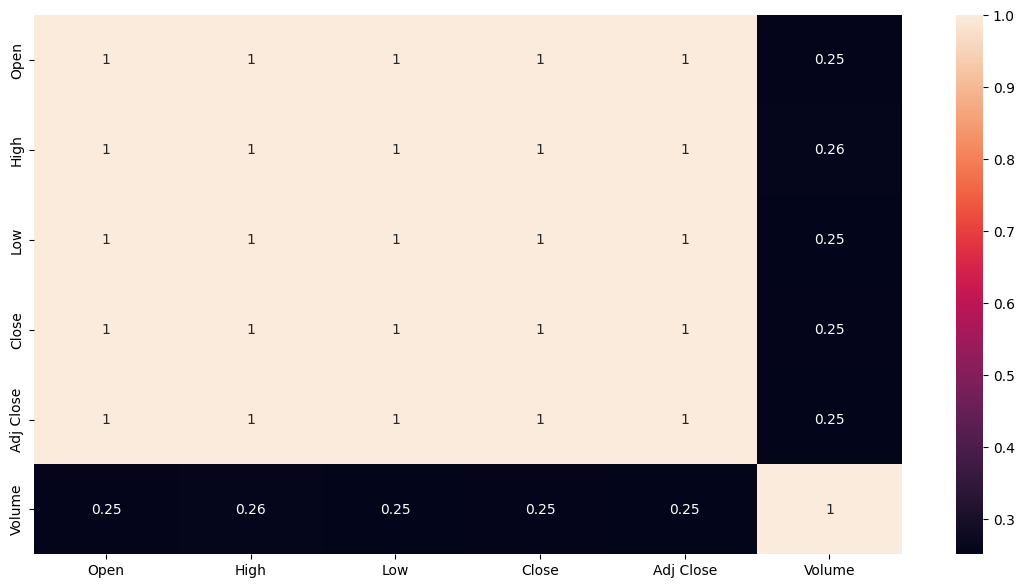

In [24]:
# lets look at some of the Correlations for the dataset.
plt.figure(1,figsize = (14 , 7))
cor = sns.heatmap(train_data.corr(), annot = True)

In [26]:
# Creating input and output Data

# Selecting Features for model
X = train_data[['High','Low','Open','Volume','Adj Close']].values
y = train_data['Close'].values

In [27]:
#Splitting train and test data with help of sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [33]:
#  Let's discuss our Linear regression model 

reg = LinearRegression()


In [34]:
reg.fit(X_train, y_train);

In [35]:
print(f'Value of Coefficients - {reg.coef_}')

Value of Coefficients - [ 6.47880474e-01  6.42688139e-01 -4.75013020e-01  1.10774505e-08
  1.87301456e-01]


In [36]:
print(f'Value of Intercept - {reg.intercept_}')

Value of Intercept - 1.4091393486163497


In [37]:
# Prediction

predicted = reg.predict(X_test)

In [38]:
# Combining Actual and predicted data 

predictions = pd.DataFrame({'Observed Data': y_test.flatten(), 'Predicted Data': predicted.flatten()})

In [39]:
predictions.head(20)

,Observed Data,Predicted Data
0,76.205002,76.021841
1,1355.599976,1364.638580
2,23.415001,24.195958
3,143.919998,143.439054
4,1199.449951,1193.093558
5,43.255001,43.859942
6,97.415001,97.144436
7,893.700012,902.032445
8,67.735001,67.159819
9,524.299988,524.593742


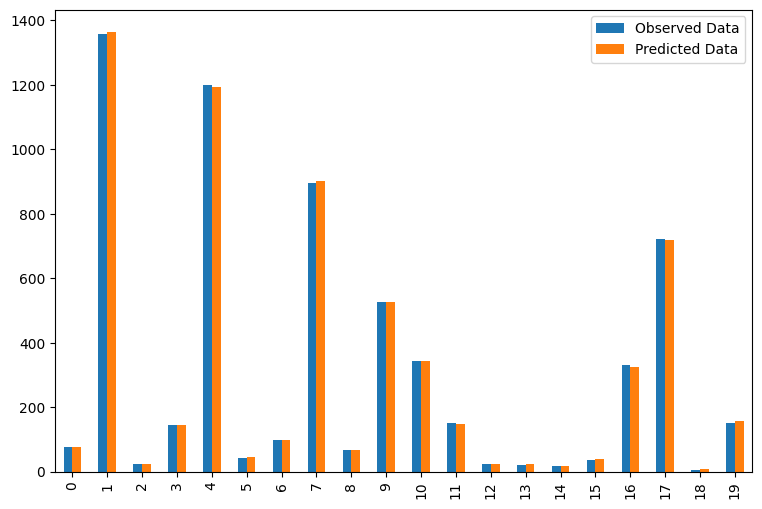

In [40]:
#Bar plot for the better visulization 

data = predictions.head(20)

data.plot(kind='bar',figsize =(9,6));

In [42]:
# Error estimation 

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test,predicted)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test,predicted)}')
print(f'Root Mean Squared Error: {math.sqrt(metrics.mean_squared_error(y_test,predicted))}')

Mean Absolute Error: 1.7764535195253828
Mean Squared Error: 9.042443257111506
Root Mean Squared Error: 3.0070655558386994


In [ ]:
#Mean Absolute Error: 1.7764535195253828
#Mean Squared Error: 9.042443257111506
#Root Mean Squared Error: 3.0070655558386994